In [1]:
import matplotlib.pyplot as plt
from my_nn import my_MPL, flower_dataset
import numpy as np


In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    x = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(x.T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

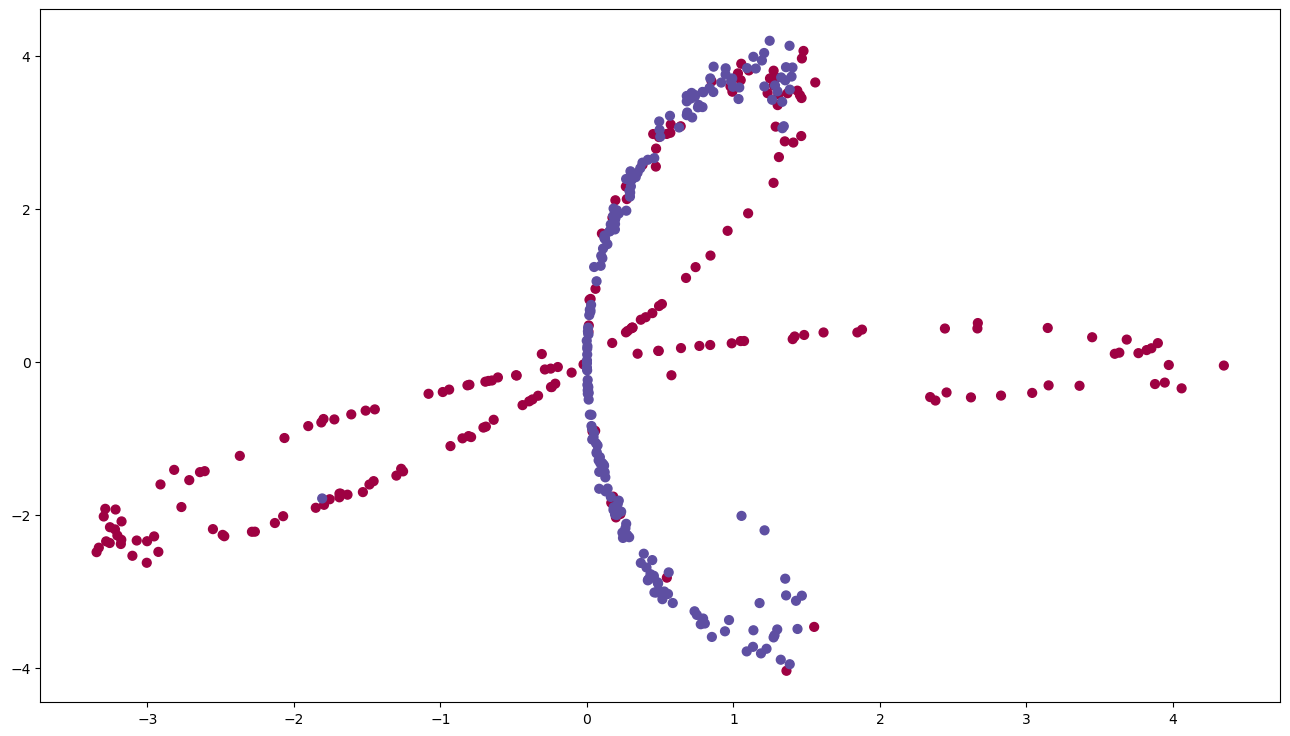

In [3]:
dataset = flower_dataset(num_petals=5)

# plot dataset
dataset.plot_flower()


X = dataset.points
Y = dataset.labels


In [4]:
model = my_MPL(num_inputs=X.shape[0], hidden_layers=[3], num_outputs=Y.shape[0], activations=['tanh'])

model.get_parameters()

the weight matrix W1 is :
 [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]
 [-0.00277388 -0.00354759]]
the bias b1 is :
 [[0.]
 [0.]
 [0.]] 
the weight matrix W2 is :
 [[-0.00082741 -0.00627001 -0.00043818]]
the bias b2 is :
 [[0.]] 


[{'W1': array([[ 0.01788628,  0.0043651 ],
         [ 0.00096497, -0.01863493],
         [-0.00277388, -0.00354759]]),
  'W2': array([[-0.00082741, -0.00627001, -0.00043818]])},
 {'b1': array([[0.],
         [0.],
         [0.]]),
  'b2': array([[0.]])}]

In [5]:

model.train(X, Y, num_iter=10000, learning_rate=1.2)

model.accuracy(X, Y)

Cost function : 0.6931453004750169 at iter 0
Cost function : 0.3348463049435877 at iter 1000
Cost function : 0.32459946053226846 at iter 2000
Cost function : 0.3209489396364613 at iter 3000
Cost function : 0.3194649758753505 at iter 4000
Cost function : 0.3188608341458166 at iter 5000
Cost function : 0.31860659980417766 at iter 6000
Cost function : 0.3184871236981012 at iter 7000
Cost function : 0.3184153549546439 at iter 8000
Cost function : 0.31835727819803955 at iter 9000
Training complete!
Accuracy on this set is: 0.8675


In [6]:
predictions = model.predict(X)


In [7]:
predictions.shape

(1, 400)

In [8]:
model.get_parameters()

the weight matrix W1 is :
 [[10.19962895  1.15469377]
 [ 0.91249869  1.65785992]
 [ 3.05655599 -1.2330487 ]]
the bias b1 is :
 [[ 1.96347604]
 [ 0.69307505]
 [-0.79930264]] 
the weight matrix W2 is :
 [[ 9.10713948 -6.50895926 -5.79496217]]
the bias b2 is :
 [[-7.2422857]] 


[{'W1': array([[10.19962895,  1.15469377],
         [ 0.91249869,  1.65785992],
         [ 3.05655599, -1.2330487 ]]),
  'W2': array([[ 9.10713948, -6.50895926, -5.79496217]])},
 {'b1': array([[ 1.96347604],
         [ 0.69307505],
         [-0.79930264]]),
  'b2': array([[-7.2422857]])}]

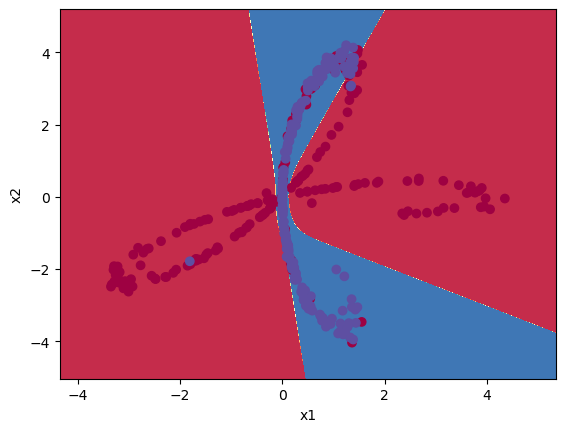

In [9]:
plot_decision_boundary(model, X, Y)

## Example 2

In [10]:
import sklearn

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

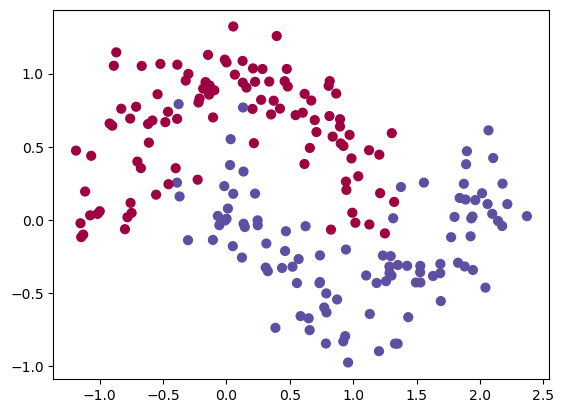

In [11]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [37]:
n_x = X.shape[0]
n_y = Y.shape[0]
hidden = [3]
model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y,activations = ['tanh'])

In [38]:

model.train(X, Y, num_iter=10000, learning_rate=0.5)

model.accuracy(X, Y)

Cost function : 0.6931746913990747 at iter 0
Cost function : 0.2817972685327317 at iter 1000
Cost function : 0.2815525953276361 at iter 2000
Cost function : 0.28144637001487177 at iter 3000
Cost function : 0.281395798538326 at iter 4000
Cost function : 0.2813677872023758 at iter 5000
Cost function : 0.28134892032838565 at iter 6000
Cost function : 0.28133359325893464 at iter 7000
Cost function : 0.28131930352424867 at iter 8000
Cost function : 0.2813047625651021 at iter 9000
Training complete!
Accuracy on this set is: 0.895


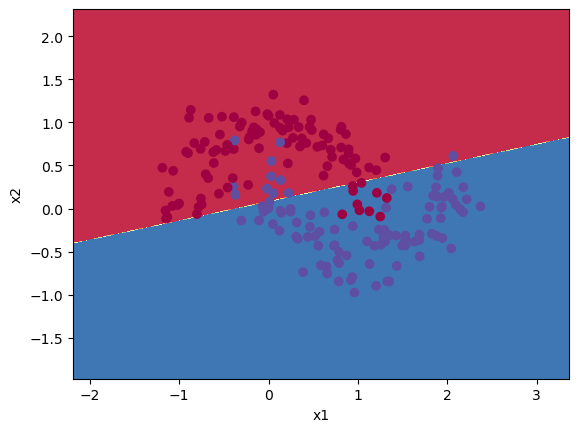

In [39]:
plot_decision_boundary(model, X, Y)

Try different units in the hiiden layer

Cost function : 0.6931534497339197 at iter 0
Cost function : 0.28053407647660283 at iter 1000
Cost function : 0.2801415985900477 at iter 2000
Cost function : 0.2799655093833273 at iter 3000
Cost function : 0.2798413106494668 at iter 4000
Cost function : 0.27973612430785616 at iter 5000
Cost function : 0.2796315213681917 at iter 6000
Cost function : 0.27950842387798647 at iter 7000
Cost function : 0.27934519927921087 at iter 8000
Cost function : 0.27912126370401696 at iter 9000
Training complete!
for [12, 15] units in hidden layer the accuracy is: 
Accuracy on this set is: 0.89
Cost function : 0.6931575712554989 at iter 0
Cost function : 0.2803531114691926 at iter 1000
Cost function : 0.27984439416931584 at iter 2000
Cost function : 0.2795124371762355 at iter 3000
Cost function : 0.2791552459041396 at iter 4000
Cost function : 0.27875427977857453 at iter 5000
Cost function : 0.2783237253326776 at iter 6000
Cost function : 0.2778830565971984 at iter 7000
Cost function : 0.277449292393754

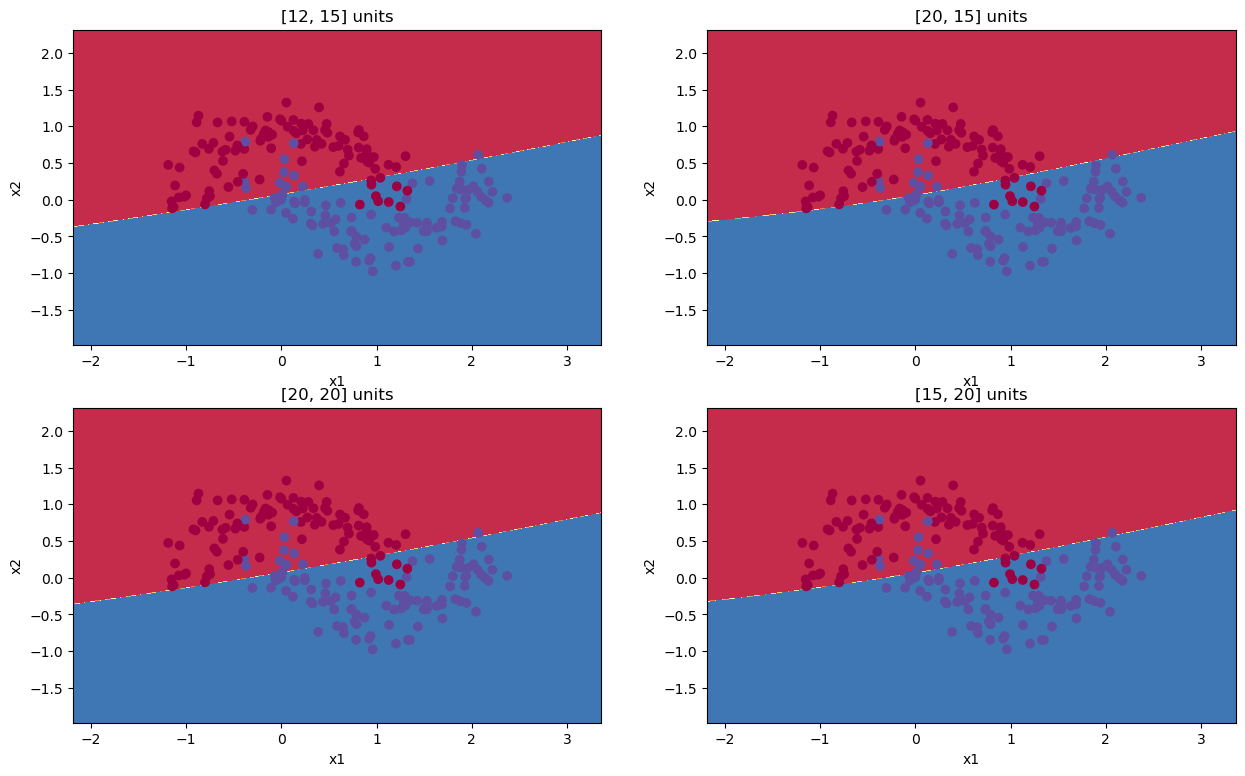

In [29]:
#Hidden = [[10, 7, 5], [5, 6, 7], [8, 10, 12], [15, 10]]
Hidden = [[12, 15], [20, 15], [20, 20], [15, 20]]

plt.figure(figsize=(15,9))


for i, hidden in enumerate(Hidden):
    model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y,activations = ['tanh'])
    model.train(X, Y, num_iter=10000, learning_rate=1.2)
    print("for {} units in hidden layer the accuracy is: ".format(hidden[:]))
    model.accuracy(X, Y)
    print("=======================")
    plt.subplot(2,2, i+1)
    plot_decision_boundary(model, X, Y)
    plt.title("{} units".format(hidden[:]))
    

trying different learning rates:

In [30]:
(1.5 -0.9)/6

0.09999999999999999

Cost function : 0.693158581147308 at iter 0
Cost function : 0.2809759186882915 at iter 1000
Cost function : 0.28061571671998353 at iter 2000
Cost function : 0.2803947241162051 at iter 3000
Cost function : 0.2802602266644308 at iter 4000
Cost function : 0.28017571131585867 at iter 5000
Cost function : 0.2801182810932847 at iter 6000
Cost function : 0.2800753250492105 at iter 7000
Cost function : 0.28004047501623974 at iter 8000
Cost function : 0.2800105815012349 at iter 9000
Training complete!
for learning rate 0.9 the accuracy is: 
Accuracy on this set is: 0.89
Cost function : 0.693158581147308 at iter 0
Cost function : 0.2809271693091807 at iter 1000
Cost function : 0.28055684320520924 at iter 2000
Cost function : 0.2803424895963333 at iter 3000
Cost function : 0.2802182648487927 at iter 4000
Cost function : 0.28014159012208045 at iter 5000
Cost function : 0.28008864266820693 at iter 6000
Cost function : 0.2800478183525604 at iter 7000
Cost function : 0.2800137991987025 at iter 8000
C

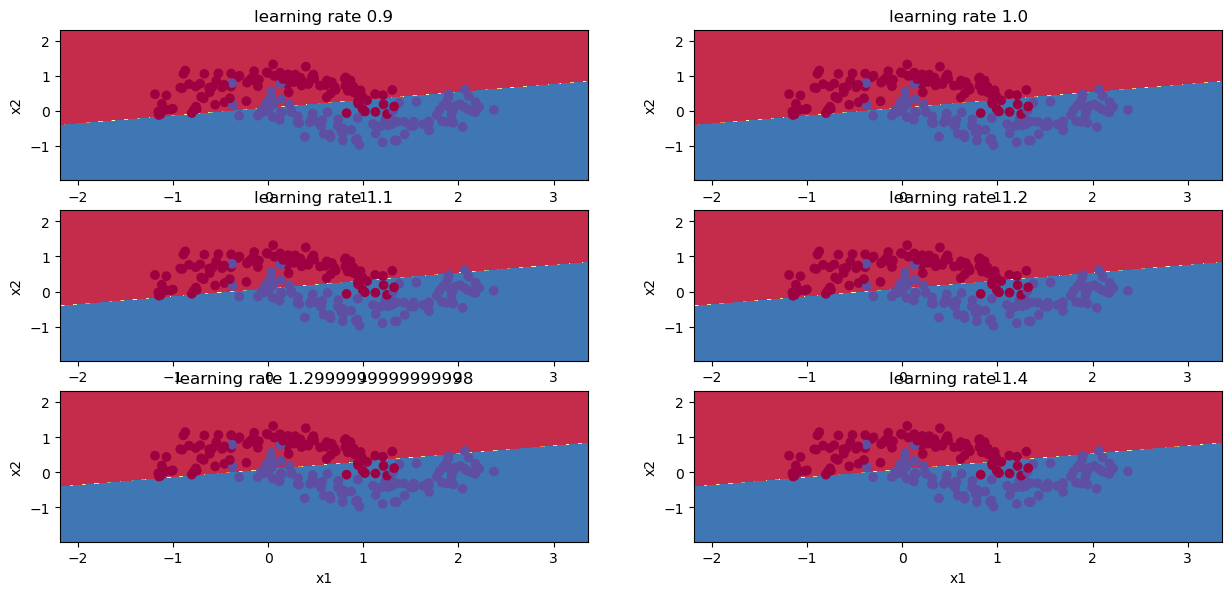

In [31]:
rates = np.arange(0.9, 1.5, 0.1)
plt.figure(figsize=(15,9))

for i, rate in enumerate(rates):
    model = my_MPL(num_inputs = n_x, hidden_layers = [4], num_outputs = n_y,activations = ['tanh'])
    model.train(X, Y, num_iter=10000, learning_rate=rate)
    print("for learning rate {} the accuracy is: ".format(rate))
    model.accuracy(X, Y)
    print("=======================")
    plt.subplot(4,2, i+1)
    plot_decision_boundary(model, X, Y)
    plt.title("learning rate {}".format(rate))
    

## Example 3:

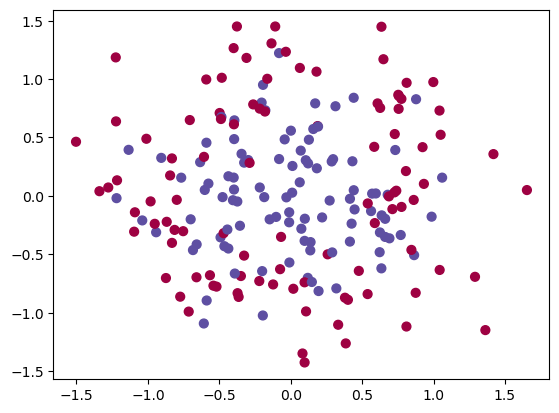

In [41]:

dataset = "noisy_circles"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])




# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost function : 0.6931475659885248 at iter 0
Cost function : 0.6931462497256979 at iter 1000
Cost function : 0.6931327937052927 at iter 2000
Cost function : 0.47836363666849435 at iter 3000
Cost function : 0.47798744446614344 at iter 4000
Cost function : 0.49318146113931394 at iter 5000
Cost function : 0.48461094385670817 at iter 6000
Cost function : 0.4902615091766737 at iter 7000
Cost function : 0.5049309348937859 at iter 8000
Cost function : 0.5439059786939343 at iter 9000
Training complete!
Accuracy on this set is: 0.685


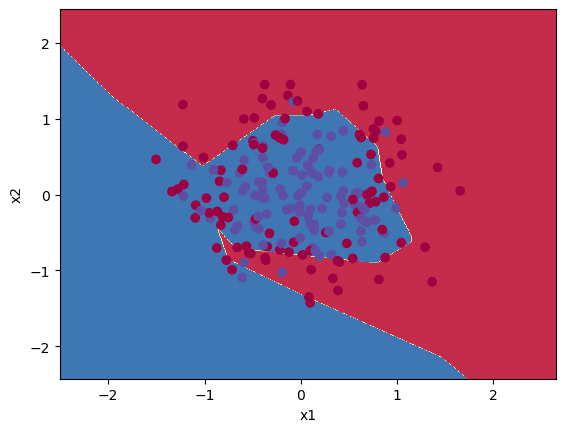

In [52]:
n_x = X.shape[0]
n_y = Y.shape[0]
hidden = [10, 5]

model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y, activations=['relu'])
model.train(X, Y, num_iter=10000, learning_rate=1.2)
model.accuracy(X, Y)
plot_decision_boundary(model, X, Y)